# Task 1: Retrieving and Preparing the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
avila_train = pd.read_csv('avila-tr.csv', sep=',', decimal='.')
avila_test = pd.read_csv('avila-ts.csv', sep=',', decimal='.')

In [3]:
avila_train.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [4]:
avila_train.shape

(10430, 11)

In [5]:
avila_test.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing,class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A


In [6]:
avila_test.shape

(10437, 11)

In [7]:
avila_train.dtypes

intercolumnar distance               float64
upper margin                         float64
lower margin                         float64
exploitation                         float64
row number                           float64
modular ratio                        float64
interlinear spacing                  float64
weight                               float64
peak number                          float64
modular ratio/interlinear spacing    float64
class                                 object
dtype: object

In [8]:
avila_test.dtypes

intercolumnar distance               float64
upper margin                         float64
lower margin                         float64
exploitation                         float64
row number                           float64
modular ratio                        float64
interlinear spacing                  float64
weight                               float64
peak number                          float64
modular ratio/interlinear spacing    float64
class                                 object
dtype: object

## Pre-Processing

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### Training Set

In [10]:
avila_train_cleaned = avila_train.copy()

In [11]:
avila_train_cleaned.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541991,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [12]:
avila_train_cleaned['class'].value_counts()

class
A    4286
F    1961
E    1095
I     831
X     522
H     519
G     446
D     352
Y     266
C     103
W      44
B       5
Name: count, dtype: int64

#### Remove outliers

In [13]:
Q1 = avila_train_cleaned['intercolumnar distance'].quantile(0.25)
Q3 = avila_train_cleaned['intercolumnar distance'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_train_cleaned[(avila_train_cleaned['intercolumnar distance'] < Q1 - threshold * IQR) | (avila_train_cleaned['intercolumnar distance'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 994 outliers.


In [14]:
avila_train_cleaned = avila_train_cleaned.drop(outliers.index)

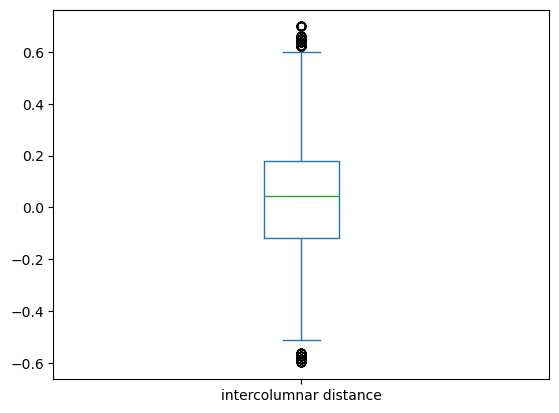

In [15]:
avila_train_cleaned['intercolumnar distance'].plot(kind='box')
plt.show()

In [16]:
Q1 = avila_train_cleaned['upper margin'].quantile(0.25)
Q3 = avila_train_cleaned['upper margin'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_train_cleaned[(avila_train_cleaned['upper margin'] < Q1 - threshold * IQR) | (avila_train_cleaned['upper margin'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 383 outliers.


In [17]:
avila_train_cleaned = avila_train_cleaned.drop(outliers.index)

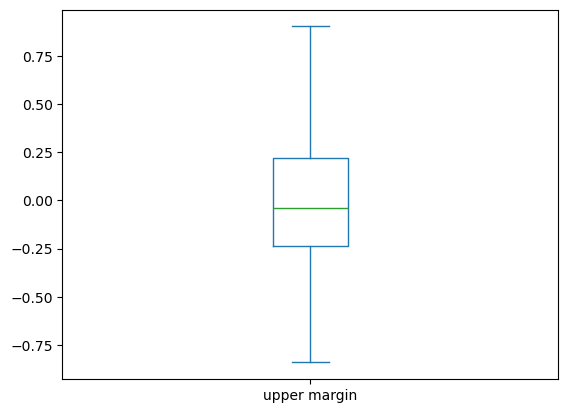

In [18]:
avila_train_cleaned['upper margin'].plot(kind='box')
plt.show()

In [19]:
Q1 = avila_train_cleaned['lower margin'].quantile(0.25)
Q3 = avila_train_cleaned['lower margin'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_train_cleaned[(avila_train_cleaned['lower margin'] < Q1 - threshold * IQR) | (avila_train_cleaned['lower margin'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 751 outliers.


In [20]:
avila_train_cleaned = avila_train_cleaned.drop(outliers.index)

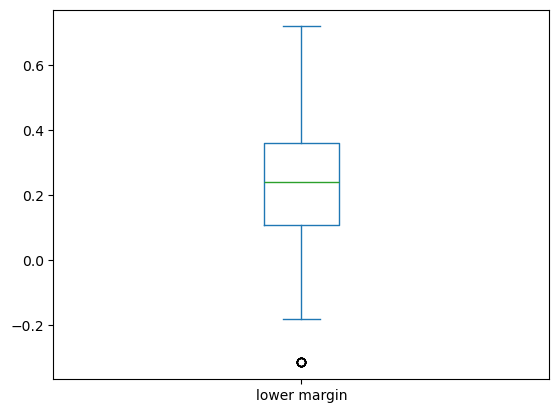

In [21]:
avila_train_cleaned['lower margin'].plot(kind='box')
plt.show()

In [22]:
Q1 = avila_train_cleaned['exploitation'].quantile(0.25)
Q3 = avila_train_cleaned['exploitation'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_train_cleaned[(avila_train_cleaned['exploitation'] < Q1 - threshold * IQR) | (avila_train_cleaned['exploitation'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 141 outliers.


In [23]:
avila_train_cleaned = avila_train_cleaned.drop(outliers.index)

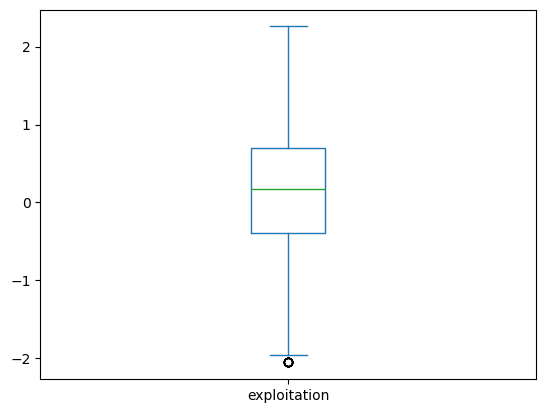

In [24]:
avila_train_cleaned['exploitation'].plot(kind='box')
plt.show()

In [25]:
Q1 = avila_train_cleaned['row number'].quantile(0.25)
Q3 = avila_train_cleaned['row number'].quantile(0.75)
IQR = Q3 - Q1
threshold = 8
outliers = avila_train_cleaned[(avila_train_cleaned['row number'] < Q1 - threshold * IQR) | (avila_train_cleaned['row number'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 967 outliers.


In [26]:
avila_train_cleaned = avila_train_cleaned.drop(outliers.index)

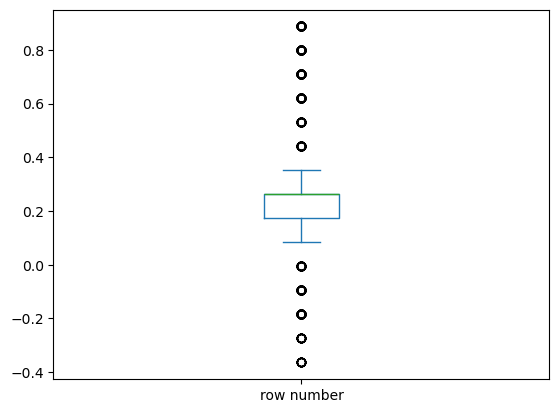

In [27]:
avila_train_cleaned['row number'].plot(kind='box')
plt.show()

In [28]:
Q1 = avila_train_cleaned['modular ratio'].quantile(0.25)
Q3 = avila_train_cleaned['modular ratio'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_train_cleaned[(avila_train_cleaned['modular ratio'] < Q1 - threshold * IQR) | (avila_train_cleaned['modular ratio'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 213 outliers.


In [29]:
avila_train_cleaned = avila_train_cleaned.drop(outliers.index)

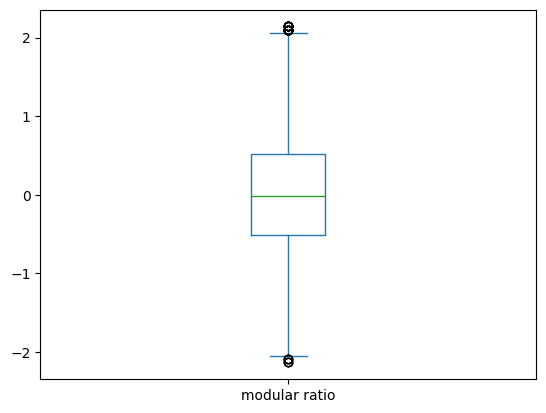

In [30]:
avila_train_cleaned['modular ratio'].plot(kind='box')
plt.show()

In [31]:
Q1 = avila_train_cleaned['interlinear spacing'].quantile(0.25)
Q3 = avila_train_cleaned['interlinear spacing'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_train_cleaned[(avila_train_cleaned['interlinear spacing'] < Q1 - threshold * IQR) | (avila_train_cleaned['interlinear spacing'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 613 outliers.


In [32]:
avila_train_cleaned = avila_train_cleaned.drop(outliers.index)

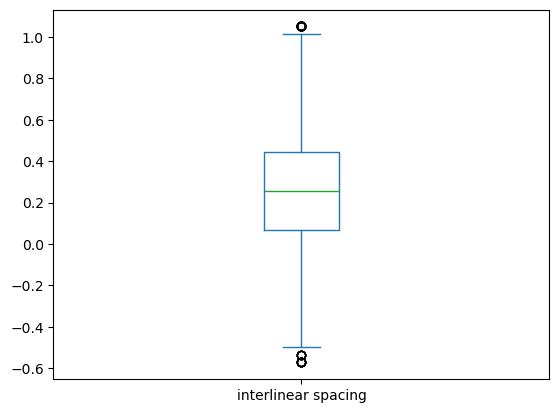

In [33]:
avila_train_cleaned['interlinear spacing'].plot(kind='box')
plt.show()

In [34]:
Q1 = avila_train_cleaned['weight'].quantile(0.25)
Q3 = avila_train_cleaned['weight'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_train_cleaned[(avila_train_cleaned['weight'] < Q1 - threshold * IQR) | (avila_train_cleaned['weight'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 143 outliers.


In [35]:
avila_train_cleaned = avila_train_cleaned.drop(outliers.index)

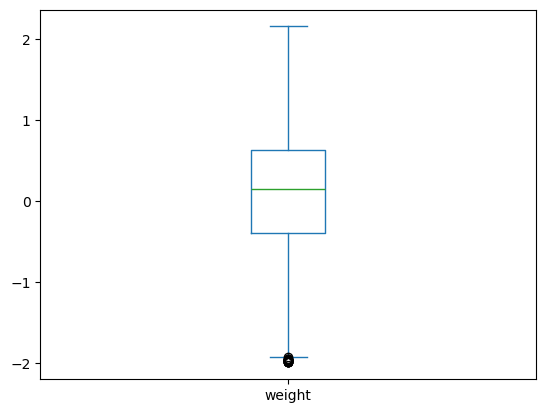

In [36]:
avila_train_cleaned['weight'].plot(kind='box')
plt.show()

In [37]:
Q1 = avila_train_cleaned['peak number'].quantile(0.25)
Q3 = avila_train_cleaned['peak number'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_train_cleaned[(avila_train_cleaned['peak number'] < Q1 - threshold * IQR) | (avila_train_cleaned['peak number'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 295 outliers.


In [38]:
avila_train_cleaned = avila_train_cleaned.drop(outliers.index)

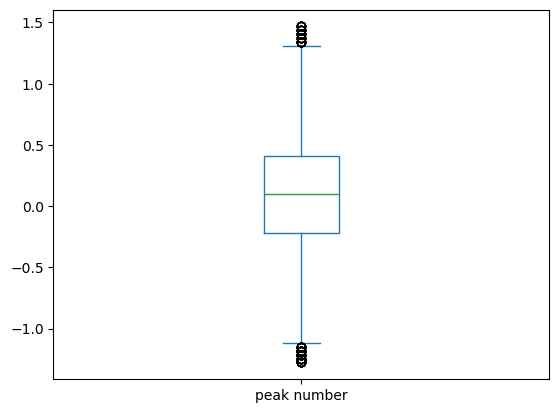

In [39]:
avila_train_cleaned['peak number'].plot(kind='box')
plt.show()

In [40]:
Q1 = avila_train_cleaned['modular ratio/interlinear spacing'].quantile(0.25)
Q3 = avila_train_cleaned['modular ratio/interlinear spacing'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_train_cleaned[(avila_train_cleaned['modular ratio/interlinear spacing'] < Q1 - threshold * IQR) | (avila_train_cleaned['modular ratio/interlinear spacing'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 61 outliers.


In [41]:
avila_train_cleaned = avila_train_cleaned.drop(outliers.index)

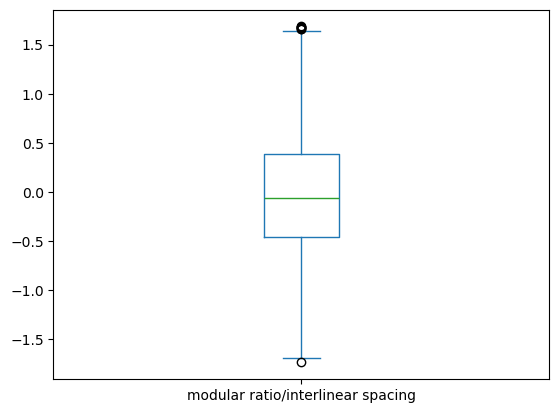

In [42]:
avila_train_cleaned['modular ratio/interlinear spacing'].plot(kind='box')
plt.show()

#### Check for missing values

In [43]:
columns = avila_train_cleaned.columns.tolist()

count = 1
for col in columns:
    if (col == 'class'):
        break
    
    num_missing = len(avila_train_cleaned[avila_train_cleaned[col].isnull() == True].index)
    print(f'{count}. Column {col} has {num_missing} missing value(s).')
    count+=1

1. Column intercolumnar distance has 0 missing value(s).
2. Column upper margin has 0 missing value(s).
3. Column lower margin has 0 missing value(s).
4. Column exploitation has 0 missing value(s).
5. Column row number has 0 missing value(s).
6. Column modular ratio has 0 missing value(s).
7. Column interlinear spacing has 0 missing value(s).
8. Column weight has 0 missing value(s).
9. Column peak number has 0 missing value(s).
10. Column modular ratio/interlinear spacing has 0 missing value(s).


### Testing Set

In [44]:
avila_test_cleaned = avila_test.copy()

In [45]:
avila_test_cleaned.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing
count,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000
mean,-0.000852,0.003396,0.005181,0.002616,-0.006365,-0.008886,0.002350,-0.010259,-0.008691,-0.000678
std,1.008551,0.955257,0.992430,0.991443,1.007876,1.000360,0.966827,0.996431,1.001240,0.992928
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.090167,-4.737863,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.526838,0.172340,-0.598658,-0.044076,-0.547709,-0.372457,-0.514199
50%,0.056229,-0.063555,0.217845,0.087408,0.261718,-0.058835,0.220177,0.103541,0.064084,-0.020397
75%,0.204355,0.203385,0.356544,0.627208,0.261718,0.564038,0.446679,0.639426,0.500624,0.526304
max,11.819916,19.470188,7.458681,3.987152,1.066121,12.315569,4.901228,4.580832,3.213413,11.911338


In [46]:
avila_test_cleaned['class'].value_counts()

class
A    4286
F    1962
E    1095
I     832
X     522
H     520
G     447
D     353
Y     267
C     103
W      45
B       5
Name: count, dtype: int64

#### Remove outliers

In [47]:
Q1 = avila_test_cleaned['intercolumnar distance'].quantile(0.25)
Q3 = avila_test_cleaned['intercolumnar distance'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_test_cleaned[(avila_test_cleaned['intercolumnar distance'] < Q1 - threshold * IQR) | (avila_test_cleaned['intercolumnar distance'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 1017 outliers.


In [48]:
avila_test_cleaned = avila_test_cleaned.drop(outliers.index)

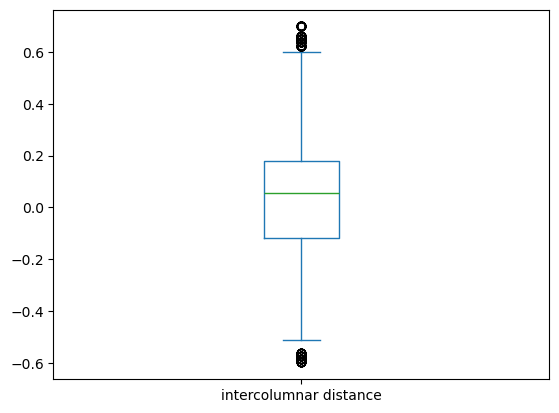

In [49]:
avila_test_cleaned['intercolumnar distance'].plot(kind='box')
plt.show()

In [50]:
Q1 = avila_test_cleaned['upper margin'].quantile(0.25)
Q3 = avila_test_cleaned['upper margin'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_test_cleaned[(avila_test_cleaned['upper margin'] < Q1 - threshold * IQR) | (avila_test_cleaned['upper margin'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 384 outliers.


In [51]:
avila_test_cleaned = avila_test_cleaned.drop(outliers.index)

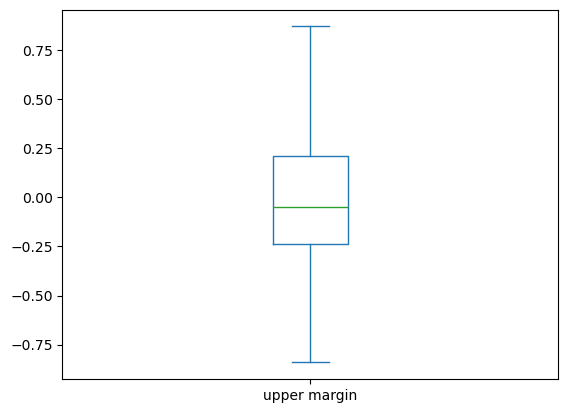

In [52]:
avila_test_cleaned['upper margin'].plot(kind='box')
plt.show()

In [53]:
Q1 = avila_test_cleaned['lower margin'].quantile(0.25)
Q3 = avila_test_cleaned['lower margin'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_test_cleaned[(avila_test_cleaned['lower margin'] < Q1 - threshold * IQR) | (avila_test_cleaned['lower margin'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 718 outliers.


In [54]:
avila_test_cleaned = avila_test_cleaned.drop(outliers.index)

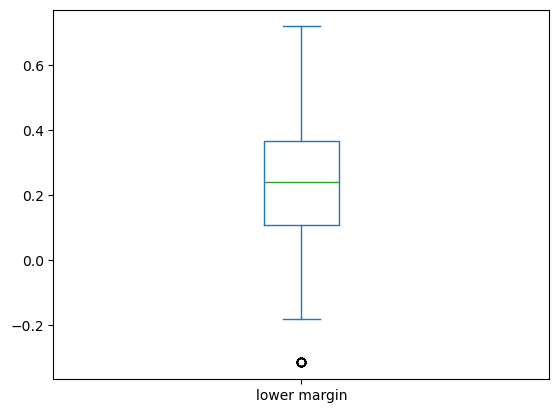

In [55]:
avila_test_cleaned['lower margin'].plot(kind='box')
plt.show()

In [56]:
Q1 = avila_test_cleaned['exploitation'].quantile(0.25)
Q3 = avila_test_cleaned['exploitation'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_test_cleaned[(avila_test_cleaned['exploitation'] < Q1 - threshold * IQR) | (avila_test_cleaned['exploitation'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 186 outliers.


In [57]:
avila_test_cleaned = avila_test_cleaned.drop(outliers.index)

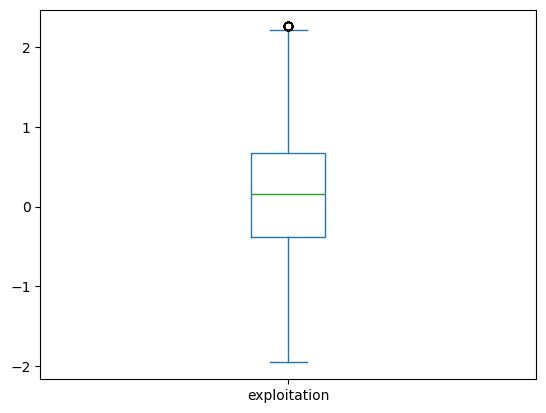

In [58]:
avila_test_cleaned['exploitation'].plot(kind='box')
plt.show()

In [59]:
Q1 = avila_test_cleaned['row number'].quantile(0.25)
Q3 = avila_test_cleaned['row number'].quantile(0.75)
IQR = Q3 - Q1
threshold = 8
outliers = avila_test_cleaned[(avila_test_cleaned['row number'] < Q1 - threshold * IQR) | (avila_test_cleaned['row number'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 980 outliers.


In [60]:
avila_test_cleaned = avila_test_cleaned.drop(outliers.index)

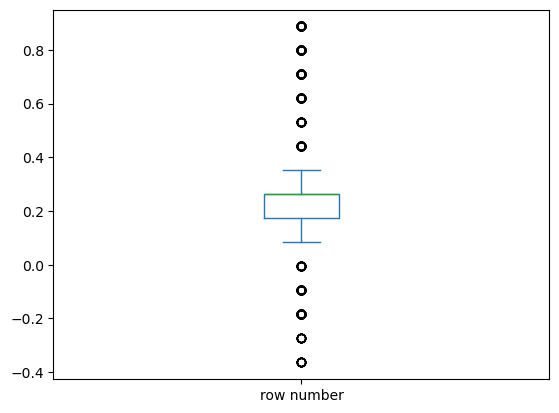

In [61]:
avila_test_cleaned['row number'].plot(kind='box')
plt.show()

In [62]:
Q1 = avila_test_cleaned['modular ratio'].quantile(0.25)
Q3 = avila_test_cleaned['modular ratio'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_test_cleaned[(avila_test_cleaned['modular ratio'] < Q1 - threshold * IQR) | (avila_test_cleaned['modular ratio'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 188 outliers.


In [63]:
avila_test_cleaned = avila_test_cleaned.drop(outliers.index)

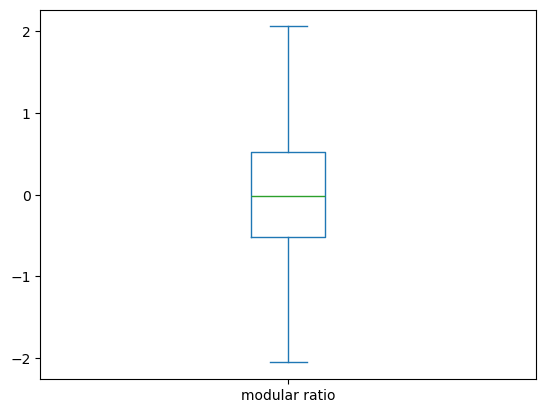

In [64]:
avila_test_cleaned['modular ratio'].plot(kind='box')
plt.show()

In [65]:
Q1 = avila_test_cleaned['interlinear spacing'].quantile(0.25)
Q3 = avila_test_cleaned['interlinear spacing'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_test_cleaned[(avila_test_cleaned['interlinear spacing'] < Q1 - threshold * IQR) | (avila_test_cleaned['interlinear spacing'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 623 outliers.


In [66]:
avila_test_cleaned = avila_test_cleaned.drop(outliers.index)

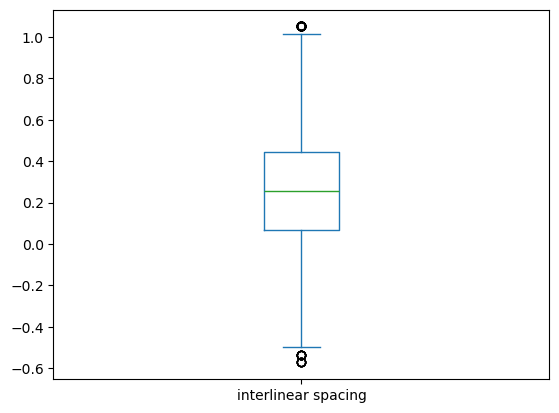

In [67]:
avila_test_cleaned['interlinear spacing'].plot(kind='box')
plt.show()

In [68]:
Q1 = avila_test_cleaned['weight'].quantile(0.25)
Q3 = avila_test_cleaned['weight'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_test_cleaned[(avila_test_cleaned['weight'] < Q1 - threshold * IQR) | (avila_test_cleaned['weight'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 137 outliers.


In [69]:
avila_test_cleaned = avila_test_cleaned.drop(outliers.index)

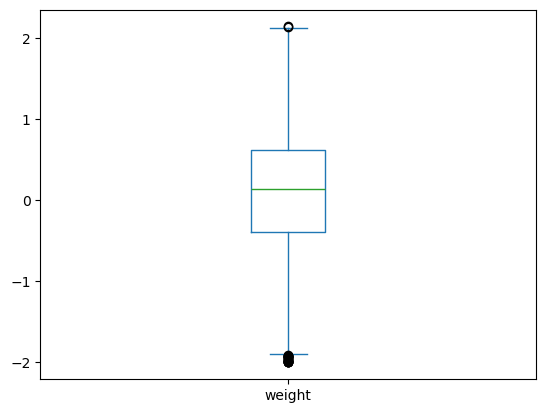

In [70]:
avila_test_cleaned['weight'].plot(kind='box')
plt.show()

In [71]:
Q1 = avila_test_cleaned['peak number'].quantile(0.25)
Q3 = avila_test_cleaned['peak number'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_test_cleaned[(avila_test_cleaned['peak number'] < Q1 - threshold * IQR) | (avila_test_cleaned['peak number'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 300 outliers.


In [72]:
avila_test_cleaned = avila_test_cleaned.drop(outliers.index)

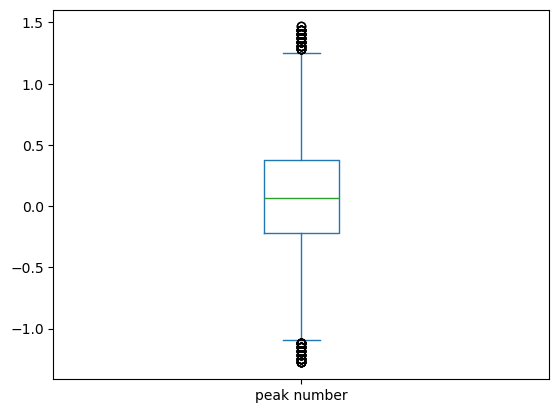

In [73]:
avila_test_cleaned['peak number'].plot(kind='box')
plt.show()

In [74]:
Q1 = avila_test_cleaned['modular ratio/interlinear spacing'].quantile(0.25)
Q3 = avila_test_cleaned['modular ratio/interlinear spacing'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = avila_test_cleaned[(avila_test_cleaned['modular ratio/interlinear spacing'] < Q1 - threshold * IQR) | (avila_test_cleaned['modular ratio/interlinear spacing'] > Q3 + threshold * IQR)]
print(f'There are {len(outliers)} outliers.')

There are 44 outliers.


In [75]:
avila_test_cleaned = avila_test_cleaned.drop(outliers.index)

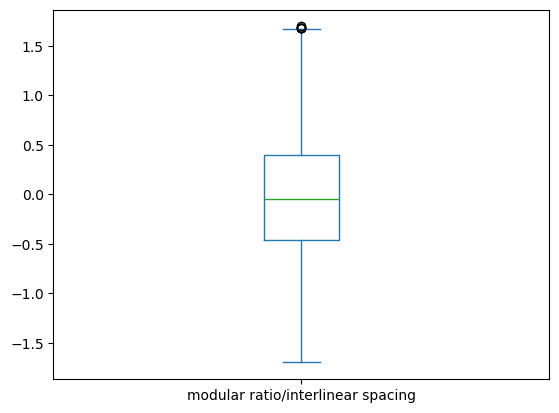

In [76]:
avila_test_cleaned['modular ratio/interlinear spacing'].plot(kind='box')
plt.show()

#### Check for missing values

In [77]:
columns = avila_test_cleaned.columns.tolist()

count = 1
for col in columns:
    if (col == 'class'):
        break
    
    num_missing = len(avila_test_cleaned[avila_test_cleaned[col].isnull() == True].index)
    print(f'{count}. Column {col} has {num_missing} missing value(s).')
    count+=1

1. Column intercolumnar distance has 0 missing value(s).
2. Column upper margin has 0 missing value(s).
3. Column lower margin has 0 missing value(s).
4. Column exploitation has 0 missing value(s).
5. Column row number has 0 missing value(s).
6. Column modular ratio has 0 missing value(s).
7. Column interlinear spacing has 0 missing value(s).
8. Column weight has 0 missing value(s).
9. Column peak number has 0 missing value(s).
10. Column modular ratio/interlinear spacing has 0 missing value(s).


In [78]:
avila_train_cleaned

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
7,0.019197,-0.040001,0.288973,-0.042597,0.261718,-1.013906,0.069175,0.890701,0.095265,-0.842014,F
8,0.500607,0.140576,0.388552,-0.637358,0.261718,-0.681707,0.295677,0.931046,0.500624,-0.642297,H
...,...,...,...,...,...,...,...,...,...,...,...
10424,0.216699,0.321153,0.128935,0.491087,0.261718,0.439463,0.069175,0.252846,0.188810,0.482857,A
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A


In [79]:
avila_test_cleaned

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing,class
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
7,0.031541,-0.118513,0.374326,-0.066706,0.261718,0.605563,0.559930,-0.258129,0.095265,0.344766,A
8,-0.091897,-0.118513,0.189393,1.280303,0.261718,0.314889,0.069175,1.277183,0.531806,0.359002,A
9,0.377169,0.014957,0.381439,0.292753,0.261718,-0.307984,0.522180,0.370989,0.562987,-0.440132,H
10,-0.202992,-0.338346,0.434785,-0.184417,0.082961,0.813187,0.295677,1.024783,0.375899,0.671230,A
...,...,...,...,...,...,...,...,...,...,...,...
10431,-0.437525,0.423218,0.388552,0.620852,0.172340,-0.889332,0.144676,2.131034,1.373706,-0.771516,E
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


In [80]:
print('TRAINING SET')
print('-----------------------------------------')
print(f'Unprocessed - number of columns: {avila_train.shape[1]}')
print(f'Unprocessed - number of rows: {avila_train.shape[0]}')
print('-----------------------------------------')
print(f'Pre-processed - number of columns: {avila_train_cleaned.shape[1]}')
print(f'Pre-processed  - number of rows: {avila_train_cleaned.shape[0]}')
print()

print('TESTING SET')
print('-----------------------------------------')
print(f'Unprocessed - number of columns: {avila_test.shape[1]}')
print(f'Unprocessed - number of rows: {avila_test.shape[0]}')
print('-----------------------------------------')
print(f'Pre-processed - number of columns: {avila_test_cleaned.shape[1]}')
print(f'Pre-processed  - number of rows: {avila_test_cleaned.shape[0]}')


TRAINING SET
-----------------------------------------
Unprocessed - number of columns: 11
Unprocessed - number of rows: 10430
-----------------------------------------
Pre-processed - number of columns: 11
Pre-processed  - number of rows: 5869

TESTING SET
-----------------------------------------
Unprocessed - number of columns: 11
Unprocessed - number of rows: 10437
-----------------------------------------
Pre-processed - number of columns: 11
Pre-processed  - number of rows: 5860


# Task 2: Data Exploration

As per C. De Stefano, M. Maniaci, F. Fontanella, and A. Scotto di Freca, "Reliable writer identification in medieval manuscripts through page layout features: The “Avila” Bible cas", the set of features that were used for scribe distinction can be divided into three groups. The first group of features align with the geometrical properties of the page, the second group relates to the exploitation of the written area for per column, and the third group displays the characteristics of the scribe's manner of distributing the text in each row.,

The dataset has already been normalized as well using the Z-normalization method. It has also been split into two sets - training set and test set.

The dataset that will be explored is the training set. This is the data that will be used to train in data modelling, therefore, it is important to perform exploration on this data to gain an understanding of each feature and the relationships and patterns involved. This enables a better comprehension of the data that will be modelled as well as a second layer of checks for anomalies that might have been missed during data curation. Further providing assurance that the data is ready for modelling and a basis for the findings that we will obtain.

The whole set of features (attributes) and the groupings are:
1. Intercolumnar distance, Upper margin, Lower margin
2. Exploitation, Row number, Modular ratio, Interlinear spacing
3. Weight, Peak number, Modular ratio/Interlinear spacing

I will explore each features as aligned to their corresponding group. Then, the relationships between at least 10 pairs of features.

## Exploration by Single Feature

### Group 1 - Geometrical Properties of the Page

In [81]:
avila_train_cleaned[['intercolumnar distance', 'upper margin', 'lower margin']].describe()

,intercolumnar distance,upper margin,lower margin
count,5869.000000,5869.000000,5869.000000
mean,0.032654,0.027889,0.229182
std,0.200756,0.311913,0.159067
min,-0.597995,-0.840822,-0.180472
25%,-0.091897,-0.204876,0.107596
50%,0.056229,-0.000745,0.239183
75%,0.154980,0.258344,0.345875
max,0.648733,0.902141,0.719297


In [82]:
avila_train_cleaned.agg({
    'intercolumnar distance': ['min', 'max', 'median', 'skew'],
    'upper margin': ['min', 'max', 'median', 'skew'],
    'lower margin': ['min', 'max', 'median', 'skew']
})

,intercolumnar distance,upper margin,lower margin
min,-0.597995,-0.840822,-0.180472
max,0.648733,0.902141,0.719297
median,0.056229,-0.000745,0.239183
skew,-0.262835,0.176715,0.030761


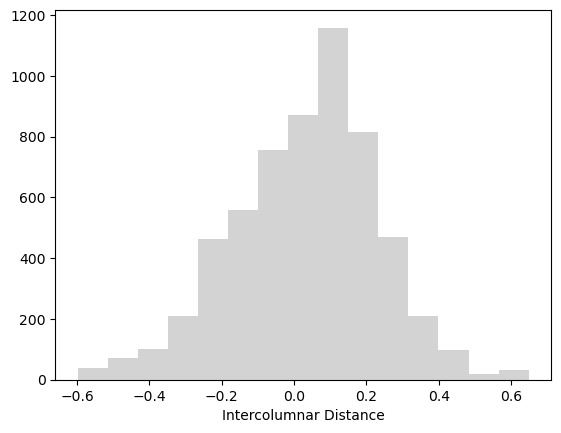

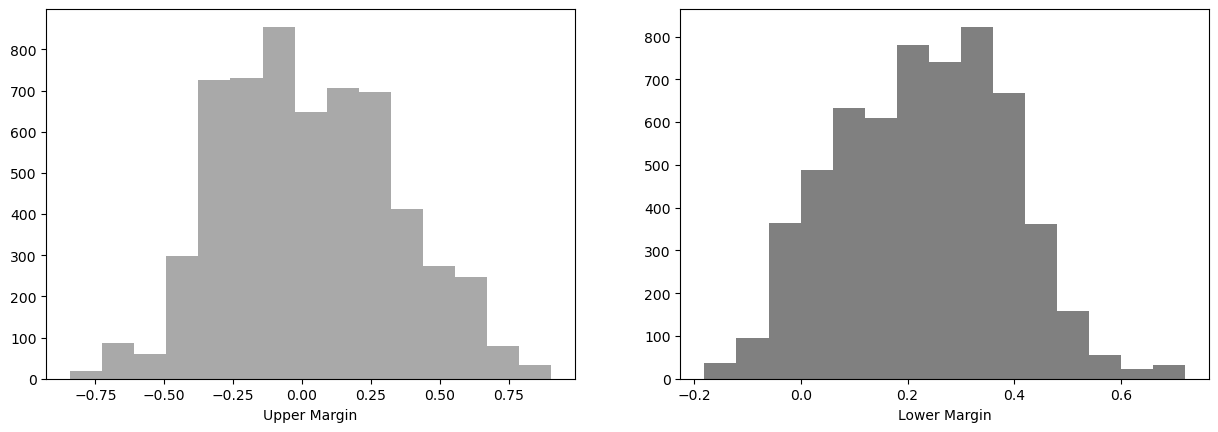

In [83]:
plt.hist(avila_train_cleaned['intercolumnar distance'], bins=15, color='lightgray')
plt.xlabel("Intercolumnar Distance")
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(avila_train_cleaned['upper margin'], bins=15, color='darkgray')
ax1.set_xlabel('Upper Margin')

ax2.hist(avila_train_cleaned['lower margin'], bins=15, color='gray')
ax2.set_xlabel('Lower Margin')

fig.set_figwidth(15)

### Group 2 - Exploitation of the Written Area per Column

In [84]:
avila_train_cleaned[['exploitation', 'row number', 'modular ratio', 'interlinear spacing']].describe()

,exploitation,row number,modular ratio,interlinear spacing
count,5869.000000,5869.000000,5869.000000,5869.000000
mean,0.106607,0.229113,0.011656,0.270969
std,0.719344,0.079117,0.714587,0.284032
min,-2.053711,-0.363929,-1.802878,-0.572582
25%,-0.356523,0.172340,-0.515608,0.069175
50%,0.131866,0.261718,-0.017310,0.257927
75%,0.593729,0.261718,0.480988,0.446679
max,2.258633,0.887365,2.141982,1.050686


In [85]:
avila_train_cleaned.agg({
    'exploitation': ['min', 'max', 'median', 'skew'],
    'row number': ['min', 'max', 'median', 'skew'],
    'modular ratio': ['min', 'max', 'median', 'skew'],
    'interlinear spacing': ['min', 'max', 'median', 'skew']
})

,exploitation,row number,modular ratio,interlinear spacing
min,-2.053711,-0.363929,-1.802878,-0.572582
max,2.258633,0.887365,2.141982,1.050686
median,0.131866,0.261718,-0.017310,0.257927
skew,-0.161881,-1.099641,0.296510,0.122646


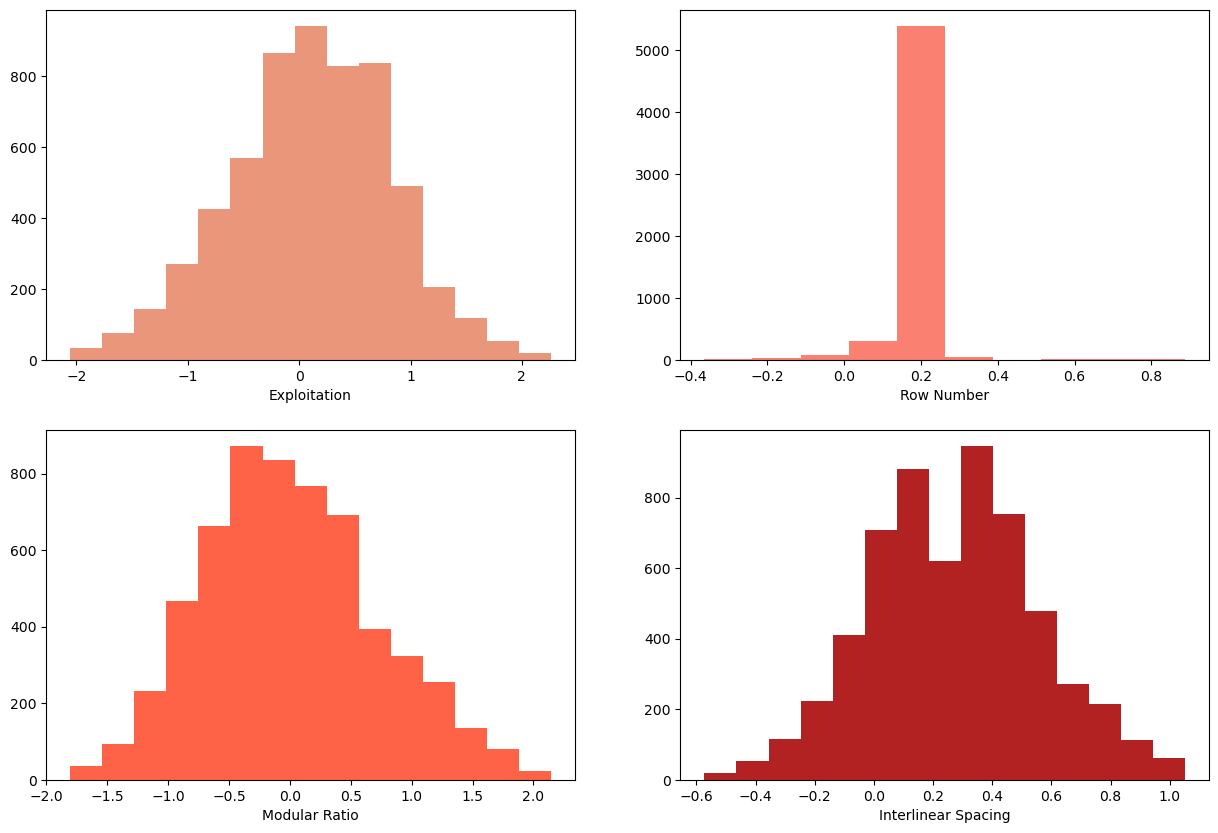

In [86]:
fig, axs = plt.subplots(2,2)

axs[0,0].hist(avila_train_cleaned['exploitation'], bins=15, color='darksalmon')
axs[0,0].set_xlabel('Exploitation')

axs[0,1].hist(avila_train_cleaned['row number'], bins=10, color='salmon')
axs[0,1].set_xlabel('Row Number')

axs[1,0].hist(avila_train_cleaned['modular ratio'], bins=15, color='tomato')
axs[1,0].set_xlabel('Modular Ratio')

axs[1,1].hist(avila_train_cleaned['interlinear spacing'], bins=15, color='firebrick')
axs[1,1].set_xlabel('Interlinear Spacing')

fig.set_figwidth(15)
fig.set_figheight(10)

### Group 3 - Scribe's Manner of Text Distribution per Row

In [87]:
avila_train_cleaned[['weight', 'peak number', 'modular ratio/interlinear spacing']].describe()

,weight,peak number,modular ratio/interlinear spacing
count,5869.000000,5869.000000,5869.000000
mean,0.115597,0.089377,-0.014308
std,0.724230,0.502921,0.629450
min,-1.990682,-1.276719,-1.736649
25%,-0.375728,-0.216549,-0.461470
50%,0.146489,0.095265,-0.060745
75%,0.605061,0.407080,0.384788
max,2.158818,1.467250,1.684789


In [88]:
avila_train_cleaned.agg({
    'weight': ['min', 'max', 'median', 'skew'],
    'peak number': ['min', 'max', 'median', 'skew'],
    'modular ratio/interlinear spacing': ['min', 'max', 'median', 'skew']
})

,weight,peak number,modular ratio/interlinear spacing
min,-1.990682,-1.276719,-1.736649
max,2.158818,1.467250,1.684789
median,0.146489,0.095265,-0.060745
skew,-0.130459,-0.047964,0.286410


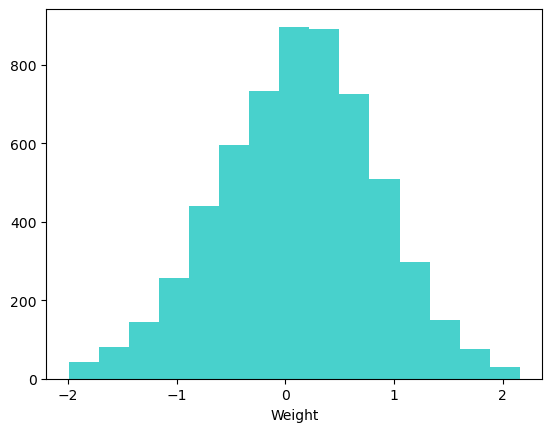

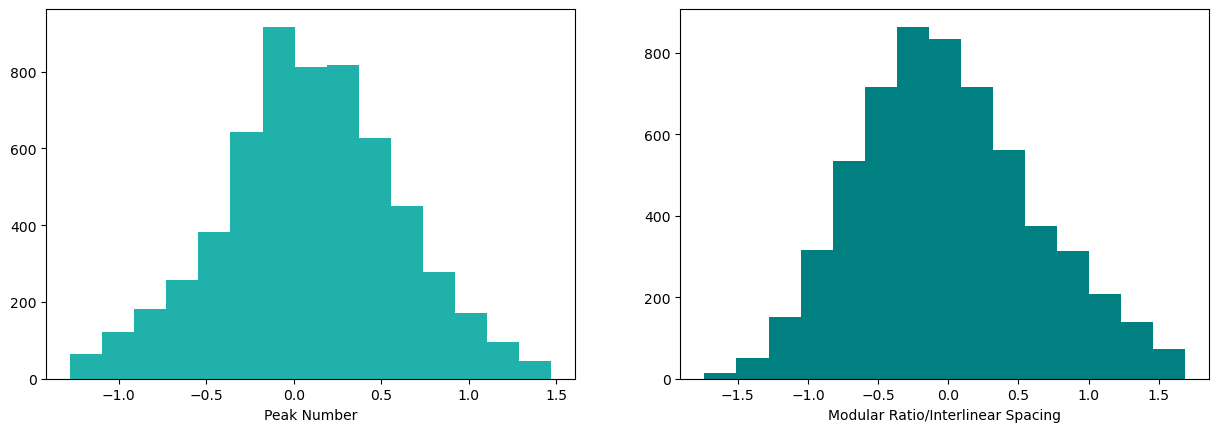

In [89]:
plt.hist(avila_train_cleaned['weight'], bins=15, color='mediumturquoise')
plt.xlabel("Weight")
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(avila_train_cleaned['peak number'], bins=15, color='lightseagreen')
ax1.set_xlabel('Peak Number')

ax2.hist(avila_train_cleaned['modular ratio/interlinear spacing'], bins=15, color='teal')
ax2.set_xlabel('Modular Ratio/Interlinear Spacing')

fig.set_figwidth(15)

In [90]:
avila_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5869 entries, 0 to 10428
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   intercolumnar distance             5869 non-null   float64
 1   upper margin                       5869 non-null   float64
 2   lower margin                       5869 non-null   float64
 3   exploitation                       5869 non-null   float64
 4   row number                         5869 non-null   float64
 5   modular ratio                      5869 non-null   float64
 6   interlinear spacing                5869 non-null   float64
 7   weight                             5869 non-null   float64
 8   peak number                        5869 non-null   float64
 9   modular ratio/interlinear spacing  5869 non-null   float64
 10  class                              5869 non-null   object 
dtypes: float64(10), object(1)
memory usage: 550.2+ KB


## Exploration by Pairs of Features

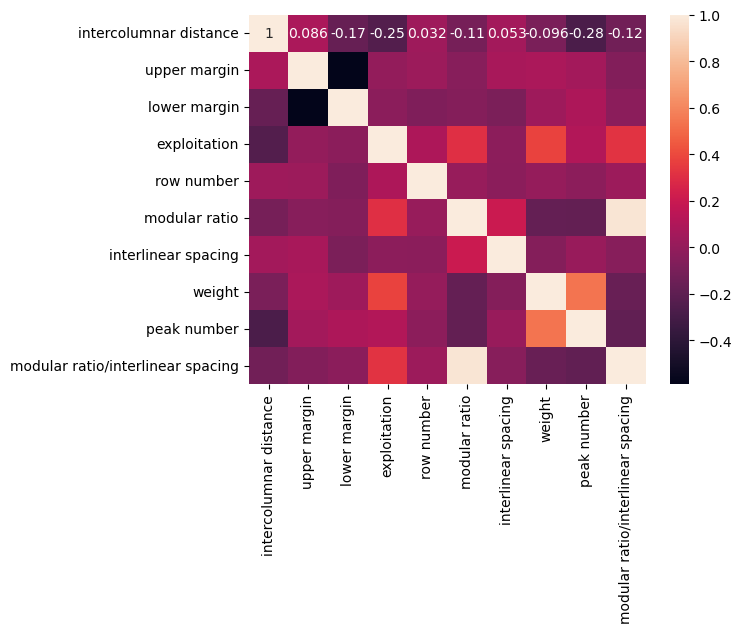

In [91]:
sns.heatmap(avila_train_cleaned.loc[:, avila_train_cleaned.columns != 'class'].corr(), annot = True)
plt.show()

In [92]:
avila_train_cleaned[['exploitation', 'intercolumnar distance']].corr()

,exploitation,intercolumnar distance
exploitation,1.00000,-0.24617
intercolumnar distance,-0.24617,1.00000


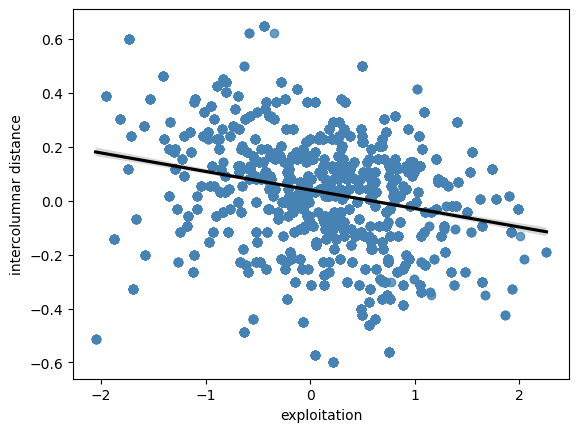

In [93]:
sns.regplot(x="exploitation", y="intercolumnar distance", data=avila_train_cleaned,
           scatter_kws={"color": "steelblue"}, line_kws={"color": "black"})
plt.show()

In [94]:
avila_train_cleaned[['exploitation', 'upper margin']].corr()

,exploitation,upper margin
exploitation,1.00000,-0.00275
upper margin,-0.00275,1.00000


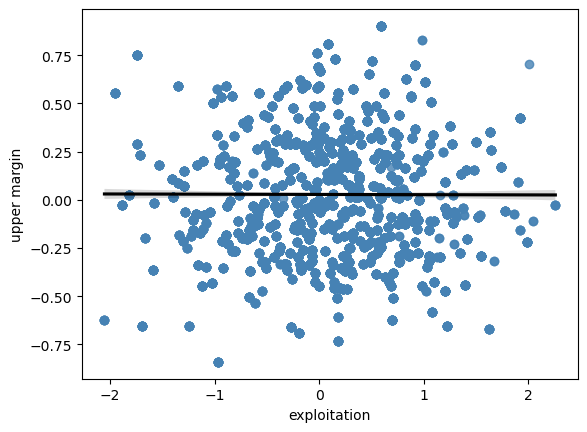

In [95]:
sns.regplot(x="exploitation", y="upper margin", data=avila_train_cleaned,
           scatter_kws={"color": "steelblue"}, line_kws={"color": "black"})
plt.show()

In [96]:
avila_train_cleaned[['exploitation', 'lower margin']].corr()

,exploitation,lower margin
exploitation,1.000000,-0.031894
lower margin,-0.031894,1.000000


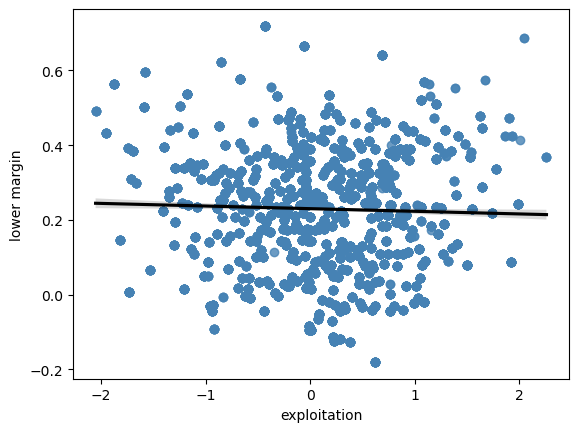

In [97]:
sns.regplot(x="exploitation", y="lower margin", data=avila_train_cleaned,
           scatter_kws={"color": "steelblue"}, line_kws={"color": "black"})
plt.show()

In [98]:
avila_train_cleaned[['exploitation', 'interlinear spacing']].corr()

,exploitation,interlinear spacing
exploitation,1.000000,-0.023941
interlinear spacing,-0.023941,1.000000


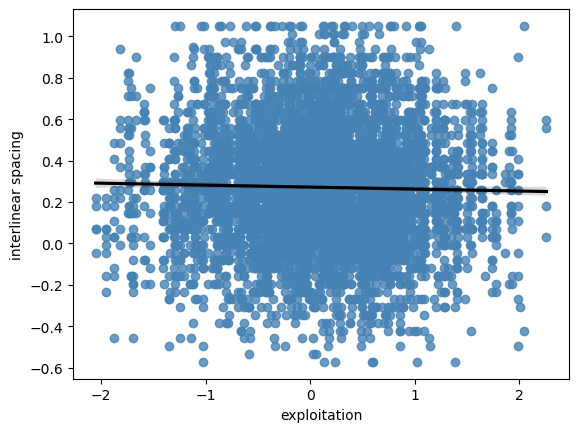

In [99]:
sns.regplot(x="exploitation", y="interlinear spacing", data=avila_train_cleaned,
           scatter_kws={"color": "steelblue"}, line_kws={"color": "black"})
plt.show()

In [100]:
avila_train_cleaned[['exploitation', 'peak number']].corr()

,exploitation,peak number
exploitation,1.00000,0.10845
peak number,0.10845,1.00000


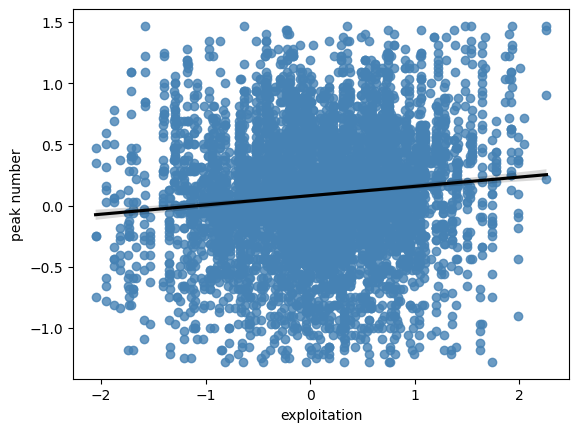

In [101]:
sns.regplot(x="exploitation", y="peak number", data=avila_train_cleaned,
           scatter_kws={"color": "steelblue"}, line_kws={"color": "black"})
plt.show()

In [102]:
avila_train_cleaned[['peak number', 'intercolumnar distance']].corr()

,peak number,intercolumnar distance
peak number,1.00000,-0.27666
intercolumnar distance,-0.27666,1.00000


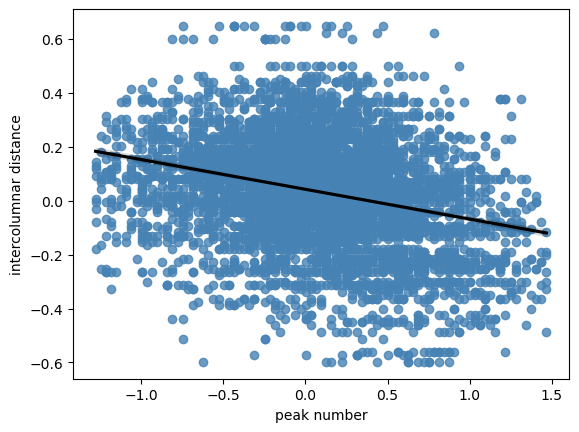

In [103]:
sns.regplot(x="peak number", y="intercolumnar distance", data=avila_train_cleaned,
           scatter_kws={"color": "steelblue"}, line_kws={"color": "black"})
plt.show()

In [104]:
avila_train_cleaned[['peak number', 'interlinear spacing']].corr()

,peak number,interlinear spacing
peak number,1.000000,0.013744
interlinear spacing,0.013744,1.000000


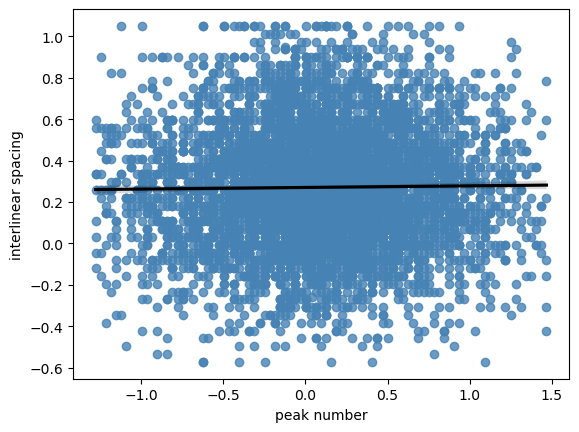

In [105]:
sns.regplot(x="peak number", y="interlinear spacing", data=avila_train_cleaned,
           scatter_kws={"color": "steelblue"}, line_kws={"color": "black"})
plt.show()

In [106]:
avila_train_cleaned[['peak number', 'weight']].corr()

,peak number,weight
peak number,1.000000,0.537816
weight,0.537816,1.000000


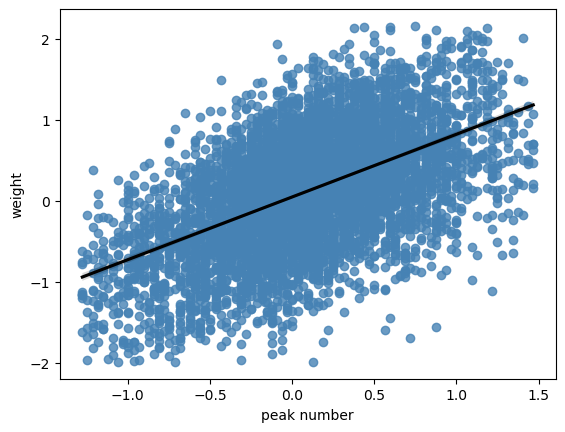

In [107]:
sns.regplot(x="peak number", y="weight", data=avila_train_cleaned,
           scatter_kws={"color": "steelblue"}, line_kws={"color": "black"})
plt.show()

In [108]:
avila_train_cleaned[['row number', 'exploitation']].corr()

,row number,exploitation
row number,1.000000,0.093998
exploitation,0.093998,1.000000


C:\Users\LanceBelen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LanceBelen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


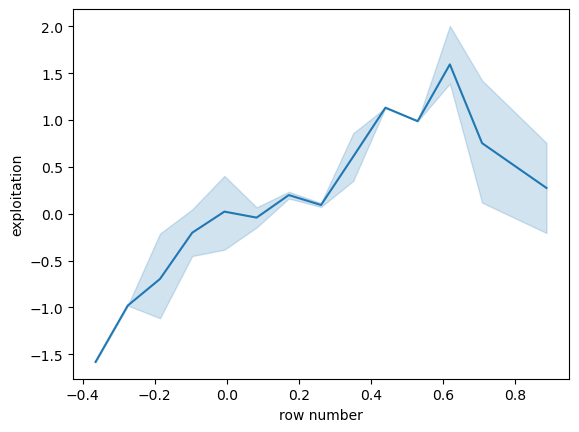

In [109]:
sns.lineplot(x="row number", y="exploitation", data=avila_train_cleaned)
plt.show()

In [110]:
avila_train_cleaned[['row number', 'weight']].corr()

,row number,weight
row number,1.000000,0.004505
weight,0.004505,1.000000


C:\Users\LanceBelen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LanceBelen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


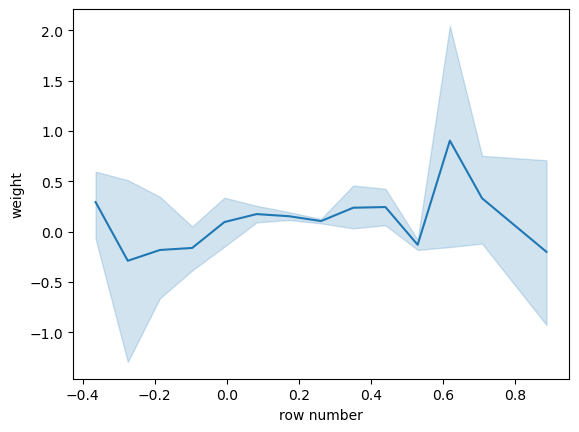

In [111]:
sns.lineplot(x="row number", y="weight", data=avila_train_cleaned)
plt.show()

# Task 3: Data Modelling

## Re-establish the train/test sets

### Training Set

In [112]:
X_train = avila_train_cleaned[['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'row number', 'modular ratio', 'interlinear spacing',
                      'weight', 'peak number', 'modular ratio/interlinear spacing']]

In [113]:
X_train = X_train.values

In [114]:
X_train

array([[ 2.660740e-01, -1.656200e-01,  3.209800e-01, ...,  9.298230e-01,
         2.511730e-01,  1.593450e-01],
       [-1.165850e-01,  6.991500e-02,  6.847600e-02, ..., -8.882360e-01,
        -1.230050e-01,  5.829390e-01],
       [ 2.290430e-01,  8.079260e-01, -5.244200e-02, ...,  5.106200e-02,
         3.290200e-02, -8.665200e-02],
       ...,
       [ 2.537300e-01, -3.383460e-01,  3.529880e-01, ...,  3.484280e-01,
         3.290200e-02, -5.271340e-01],
       [ 2.290430e-01, -7.450000e-04,  1.716110e-01, ..., -1.088486e+00,
        -5.907270e-01,  5.801420e-01],
       [-3.017430e-01,  3.525580e-01,  2.889730e-01, ...,  5.027610e-01,
         6.253500e-01,  7.189690e-01]])

In [115]:
avila_train_cleaned.dtypes

intercolumnar distance               float64
upper margin                         float64
lower margin                         float64
exploitation                         float64
row number                           float64
modular ratio                        float64
interlinear spacing                  float64
weight                               float64
peak number                          float64
modular ratio/interlinear spacing    float64
class                                 object
dtype: object

In [116]:
len(avila_train_cleaned['class'].unique())

11

In [117]:
avila_train_cleaned['class'].unique()

array(['A', 'F', 'H', 'E', 'D', 'G', 'C', 'X', 'W', 'I', 'Y'],
      dtype=object)

In [118]:
avila_train_cleaned['class'].unique()

array(['A', 'F', 'H', 'E', 'D', 'G', 'C', 'X', 'W', 'I', 'Y'],
      dtype=object)

In [119]:
y_train = avila_train_cleaned['class']

In [120]:
y_train = y_train.values

In [121]:
X_train.shape

(5869, 10)

In [122]:
y_train.shape

(5869,)

In [123]:
X_train

array([[ 2.660740e-01, -1.656200e-01,  3.209800e-01, ...,  9.298230e-01,
         2.511730e-01,  1.593450e-01],
       [-1.165850e-01,  6.991500e-02,  6.847600e-02, ..., -8.882360e-01,
        -1.230050e-01,  5.829390e-01],
       [ 2.290430e-01,  8.079260e-01, -5.244200e-02, ...,  5.106200e-02,
         3.290200e-02, -8.665200e-02],
       ...,
       [ 2.537300e-01, -3.383460e-01,  3.529880e-01, ...,  3.484280e-01,
         3.290200e-02, -5.271340e-01],
       [ 2.290430e-01, -7.450000e-04,  1.716110e-01, ..., -1.088486e+00,
        -5.907270e-01,  5.801420e-01],
       [-3.017430e-01,  3.525580e-01,  2.889730e-01, ...,  5.027610e-01,
         6.253500e-01,  7.189690e-01]])

In [124]:
y_train

array(['A', 'A', 'F', ..., 'F', 'A', 'E'], dtype=object)

### Test Set

In [125]:
X_test = avila_test_cleaned[['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'row number', 'modular ratio', 'interlinear spacing',
                      'weight', 'peak number', 'modular ratio/interlinear spacing']]

In [126]:
X_test = X_test.values

In [127]:
avila_test_cleaned.dtypes

intercolumnar distance               float64
upper margin                         float64
lower margin                         float64
exploitation                         float64
row number                           float64
modular ratio                        float64
interlinear spacing                  float64
weight                               float64
peak number                          float64
modular ratio/interlinear spacing    float64
class                                 object
dtype: object

In [128]:
len(avila_test_cleaned['class'].unique())

11

In [129]:
avila_test_cleaned['class'].unique()

array(['A', 'H', 'F', 'E', 'G', 'D', 'C', 'X', 'Y', 'W', 'I'],
      dtype=object)

In [130]:
avila_test_cleaned['class'].unique()

array(['A', 'H', 'F', 'E', 'G', 'D', 'C', 'X', 'Y', 'W', 'I'],
      dtype=object)

In [131]:
y_test = avila_test_cleaned['class']

In [132]:
y_test = y_test.values

In [133]:
X_test.shape

(5860, 10)

In [134]:
y_test.shape

(5860,)

In [135]:
X_test

array([[ 0.080916,  0.10132 ,  0.10404 , ..., -0.25343 , -0.497183,
         0.155681],
       [ 0.031541, -0.118513,  0.374326, ..., -0.258129,  0.095265,
         0.344766],
       [-0.091897, -0.118513,  0.189393, ...,  1.277183,  0.531806,
         0.359002],
       ...,
       [-0.054866,  0.580242,  0.032912, ..., -0.985508, -0.403638,
         1.276301],
       [ 0.080916,  0.588093,  0.01513 , ...,  0.163807, -0.091823,
        -0.593329],
       [ 0.377169,  0.014957,  0.381439, ..., -0.494919, -0.247731,
        -1.212974]])

In [136]:
y_test

array(['A', 'A', 'A', ..., 'A', 'F', 'H'], dtype=object)

## Data Modelling

### K-Nearest Neighbor

#### Selecting the parameters

As per Josh Rohan in an article called "Grid Search for mdoel tuning", published in Towards Data Science (2018), "Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions."

KNN and Decision Tree are non-parametric methods, and hence, offer the flexibility to select the parameters required for best optimisation. While there may be parameters for the two models that I selected before performing the Grid Search technique or parameters that weren’t included at all, it has still been identified that these combinations resulted in the most optimised model accordingly. That is, the parameters selected were identified to be a factor for the performance of the model and the parameters that weren’t selected had little to no effect on the performance.

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [138]:
# Define the grid search object
param_grid = {'n_neighbors': np.arange(1, 11),
              'weights': ['uniform', 'distance'],
              'metric': ['minkowski'],
              'p': [1, 2]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
param_n_neighbors = grid.best_params_['n_neighbors']
param_weights = grid.best_params_['weights']
param_metric = grid.best_params_['metric']
param_p = grid.best_params_['p']

print("Best n_neighbors:", param_n_neighbors)
print("Best weights:", param_weights)
print("Best metric:", param_metric)
print("Best p:", param_p)
print("Best Accuracy:", grid.best_score_)

Best n_neighbors: 4
Best weights: distance
Best metric: minkowski
Best p: 1
Best Accuracy: 0.7982621476114333


#### Training the model

In [139]:
classifier = KNeighborsClassifier(n_neighbors=param_n_neighbors, weights=param_weights, metric=param_metric, p=param_p)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [140]:
predicted = classifier.predict(X_test)

In [141]:
predicted

array(['A', 'A', 'A', ..., 'A', 'F', 'H'], dtype=object)

In [142]:
predicted.shape

(5860,)

In [143]:
print('CLASSIFICATION REPORT')
print(classification_report(y_test, predicted))
print()

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           A       0.84      0.87      0.86      2599
           C       0.89      0.71      0.79        55
           D       0.84      0.61      0.71       148
           E       0.88      0.79      0.84       702
           F       0.76      0.82      0.79      1491
           G       0.77      0.72      0.75       345
           H       0.81      0.74      0.77       426
           I       1.00      1.00      1.00         1
           W       1.00      0.81      0.90        16
           X       0.82      0.66      0.73        56
           Y       1.00      0.29      0.44        21

    accuracy                           0.82      5860
   macro avg       0.87      0.73      0.78      5860
weighted avg       0.82      0.82      0.82      5860




CONFUSION MATRIX


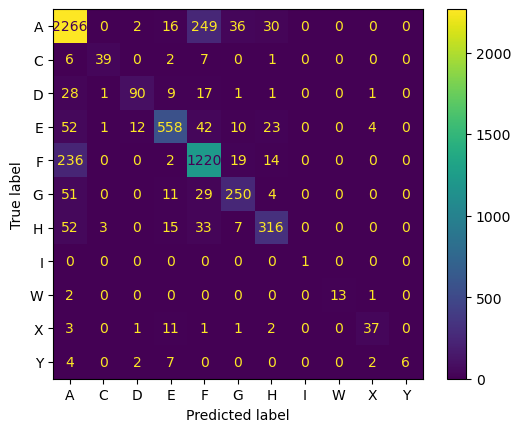

In [144]:
print('CONFUSION MATRIX')
cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [145]:
print("Train/test split score: {:.5f}".format(classifier.score(X_test, y_test)))

Train/test split score: 0.81843


### Decision Tree

#### Selecting the parameters

As per Josh Rohan in an article called "Grid Search for mdoel tuning", published in Towards Data Science (2018), "Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions."

KNN and Decision Tree are non-parametric methods, and hence, offer the flexibility to select the parameters required for best optimisation. While there may be parameters for the two models that I selected before performing the Grid Search technique or parameters that weren’t included at all, it has still been identified that these combinations resulted in the most optimised model accordingly. That is, the parameters selected were identified to be a factor for the performance of the model and the parameters that weren’t selected had little to no effect on the performance.

In [146]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
# Define the grid search object
param_grid2 = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1,20)}

grid2 = GridSearchCV(DecisionTreeClassifier(), param_grid2, cv=5, scoring='accuracy')
grid2.fit(X_train, y_train)

param_criterion = grid2.best_params_['criterion']
param_max_depth = grid2.best_params_['max_depth']

# Print the best hyperparameters and corresponding accuracy
print("Best Criterion:", param_criterion)
print("Best Max Depth:", param_max_depth)
print("Best Accuracy:", grid2.best_score_)

Best Criterion: entropy
Best Max Depth: 16
Best Accuracy: 0.9781924650461622


#### Training the model

In [148]:
classifier2 = DecisionTreeClassifier(criterion=param_criterion, max_depth=param_max_depth)
classifier2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16)

In [149]:
predicted2 = classifier2.predict(X_test)

In [150]:
print('CLASSIFICATION REPORT')
print(classification_report(y_test, predicted2))
print()

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           A       0.99      0.99      0.99      2599
           C       0.96      1.00      0.98        55
           D       1.00      0.97      0.98       148
           E       0.98      0.99      0.99       702
           F       1.00      0.99      0.99      1491
           G       0.99      1.00      1.00       345
           H       0.95      0.96      0.96       426
           I       0.33      1.00      0.50         1
           W       1.00      0.94      0.97        16
           X       1.00      0.93      0.96        56
           Y       0.95      0.90      0.93        21

    accuracy                           0.99      5860
   macro avg       0.92      0.97      0.93      5860
weighted avg       0.99      0.99      0.99      5860




CONFUSION MATRIX


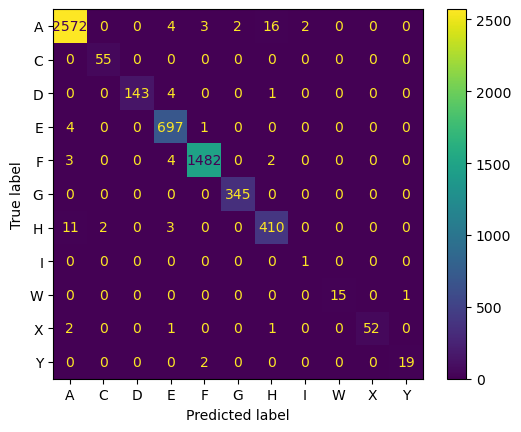

In [151]:
print('CONFUSION MATRIX')
cm2 = confusion_matrix(y_test, predicted2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=classifier2.classes_)
disp2.plot()
plt.show()

## K-Folds Cross-Validation

##### Code referenced from Week 5 Lab Sheet of a course at RMIT University: COSC2670/2738 - Practical Data Science with Python 

In [152]:
from sklearn.model_selection import KFold

In [153]:
kf = KFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = X_train[train_index], X_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

TRAIN: [   0    1    2 ... 5866 5867 5868] TEST: [   4    5   21 ... 5861 5864 5865]
TRAIN: [   0    2    4 ... 5865 5866 5868] TEST: [   1    3    6 ... 5858 5863 5867]
TRAIN: [   0    1    2 ... 5865 5866 5867] TEST: [   7    9   10 ... 5844 5848 5868]
TRAIN: [   1    2    3 ... 5865 5867 5868] TEST: [   0    8   23 ... 5859 5862 5866]
TRAIN: [   0    1    3 ... 5866 5867 5868] TEST: [   2   14   15 ... 5852 5855 5860]


#### K-Nearest Neighbor Model Evaluation

In [154]:
for k, (train_index, test_index) in enumerate(kf.split(X_train)):
    xtrain, xtest = X_train[train_index], X_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    classifier.fit(xtrain, ytrain)
    print("Fold {0} score: {1:.5f}".format(k, classifier.score(xtest, ytest)))

Fold 0 score: 0.80579
Fold 1 score: 0.81516
Fold 2 score: 0.78705
Fold 3 score: 0.77257
Fold 4 score: 0.79625


#### Decision Tree Model Evaluation

In [155]:
for k, (train_index, test_index) in enumerate(kf.split(X_train)):
    xtrain, xtest = X_train[train_index], X_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    classifier2.fit(xtrain, ytrain)
    print("Fold {0} score: {1:.5f}".format(k, classifier2.score(xtest, ytest)))

Fold 0 score: 0.97445
Fold 1 score: 0.98382
Fold 2 score: 0.98041
Fold 3 score: 0.98637
Fold 4 score: 0.96419
